In [81]:
%pylab inline
import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
import pandas as pd
import os
import glob
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import re
def strip_tx_version(txid):
    return re.sub('\.\d+', '', txid)


Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently 

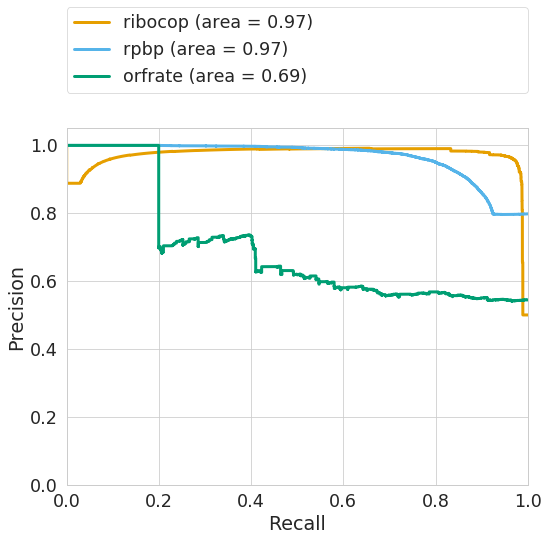

In [82]:
cbb_palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

def _plot_aurpr(y_test, y_score, ax, label, color):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auprc = average_precision_score(y_test, y_score)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    ax = plt.subplot(111)
    ax.step(recall, precision, color=color, lw=3,
             where='post', label='{} (area = {:.2f})'.format(label, auprc))
    #ax.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    #ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
    #          average_precision))
    #ax.legend(loc="lower right")
    ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=1)

def _plot_auroc(y_test, y_score, ax, label, color):
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    ax.plot(fpr, tpr, color=color,
             lw=lw, label='{} (area = {:.2f})'.format(label, roc_auc))
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    #ax.set_title('Receiver operating characteristic example')
    ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
              mode="expand", borderaxespad=0, ncol=1)
fig, ax = plt.subplots(figsize=(8,8))
for index, key in enumerate(['ribocop', 'rpbp', 'orfrate']):
    df = pd.read_table('{}_roc.txt'.format(key), names=['gid', 'tid', 'score', 'truth'])
    df = df[df.score==df.score]
    try:
        df = df[df.score!='None']
    except:
        pass

    y_truth = df['truth']#.astype(int)
    y_score = df['score'].astype(float)
    
    _plot_aurpr(y_truth, y_score, ax, key, cbb_palette[index+1])
    #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])
    
#ax.set_title(key)
ax.axis('equal')
fig.tight_layout()
fig.savefig('tx_level.pdf')

SRP078005_mouse
SRP091889_mouse
SRP062407_mouse
SRP098789_human
SRP029589_human
SRP063852_human
SRP003554_mouse
SRP010679_human


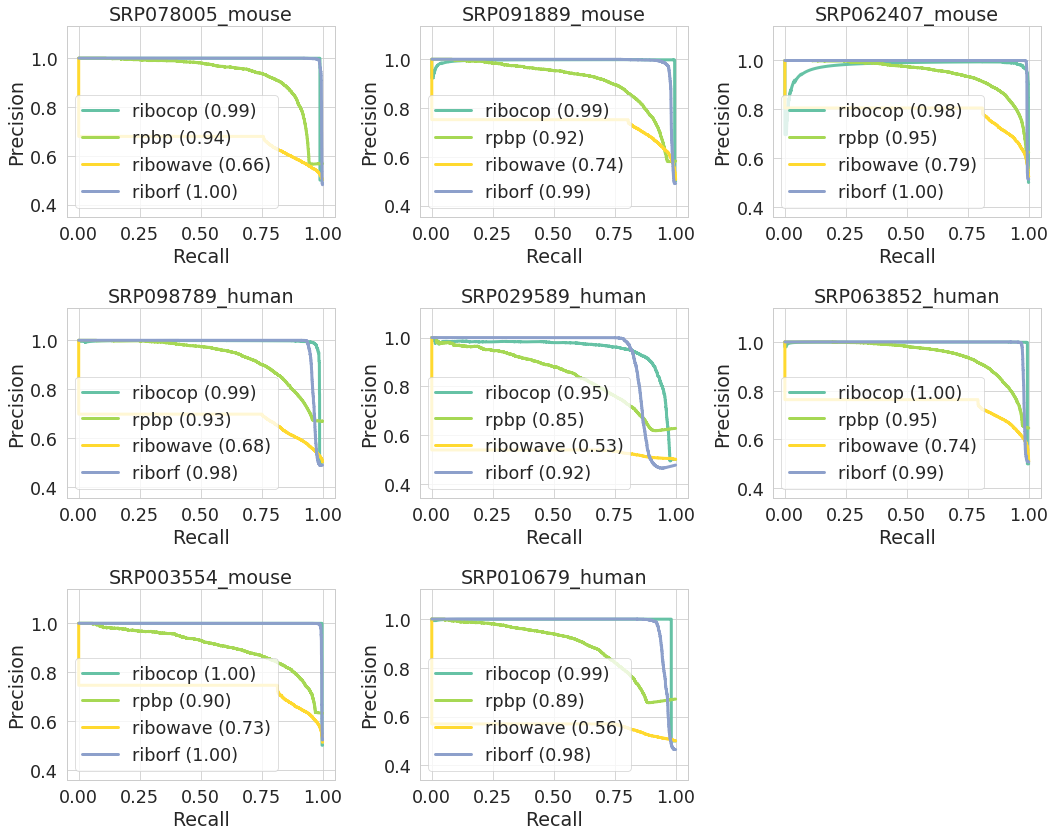

In [68]:
cbb_palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
tool_colors = {'ribocop': '#e41a1c',
          'ribocode': '#377eb8',
          'riborf': '#4daf4a',
          'orfrate': '#984ea3',
          'rpbp': '#ff7f00',
          'ribowave': '#ffff33'}
tool_colors = {'ribocop': '#66c2a5',
          'ribocode': '#fc8d62',
          'riborf': '#8da0cb',
          'orfrate': '#e78ac3',
          'rpbp': '#a6d854',
          'ribowave': '#ffd92f'}

def _plot_aurpr(y_test, y_score, ax, label, color):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auprc = average_precision_score(y_test, y_score)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    #ax = plt.subplot(111)
    ax.step(recall, precision, color=color, lw=3,
             where='post', label='{} ({:.2f})'.format(label, auprc))
    #ax.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    #ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
    #          average_precision))
    #ax.legend(loc="lower right")
    #ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
    #            mode="expand", borderaxespad=0, ncol=1)
    ax.legend(loc='lower left')

def _plot_auroc(y_test, y_score, ax, label, color):
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    ax.plot(fpr, tpr, color=color,
             lw=lw, label='{} (area = {:.2f})'.format(label, roc_auc))
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    #ax.set_title('Receiver operating characteristic example')
    #ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
     #         mode="expand", borderaxespad=0, ncol=1)
    ax.legend(loc='lower left')
    
#fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure(figsize=(15, 12))
all_samples = glob.glob('/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/scripts/gene_scripts/*_ribocop_roc.txt')
i = 1


for sample in all_samples:
    sample_name = sample.split('/')[-1].replace('_roc.txt', '')
    sample_name = '_'.join(sample_name.split('_')[:2])
    print(sample_name)
    ax = plt.subplot(int(len(all_samples)/3)+1, 3 , i)
    
    for index, key in enumerate(['ribocop', 'ribocode', 'rpbp', 'orfrate', 'ribowave', 'riborf']):
        filepath = '/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/scripts/gene_scripts/{}_{}_roc.txt'.format(sample_name, key)
        if not os.path.isfile(filepath):
            continue
        df = pd.read_table(filepath, names=['gid', 'tid', 'score', 'truth'])

        #df = df[df.score==df.score]
        try:
            df = df[df.score!='None']
        except:
            pass

        y_truth = df['truth']#.astype(int)
        y_score = df['score'].astype(float)
        if key == 'ribocode' or key == 'ribowave':
            y_truth_copy = y_truth.copy()
            y_truth_copy[y_truth_copy==0] = 1
            y_truth_copy[y_truth==1] = 0
            y_truth = y_truth_copy
        _plot_aurpr(y_truth, y_score, ax, key, tool_colors[key])
        #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])

    ax.set_title(sample_name)
    ax.axis('equal')
    i+=1
    
fig.tight_layout()
fig.savefig('tx_level_auPR_all.pdf')

SRP003554_mouse


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


SRP010679_human
SRP029589_human
SRP062407_mouse
SRP063852_human
SRP078005_mouse
SRP091889_mouse
SRP098789_human


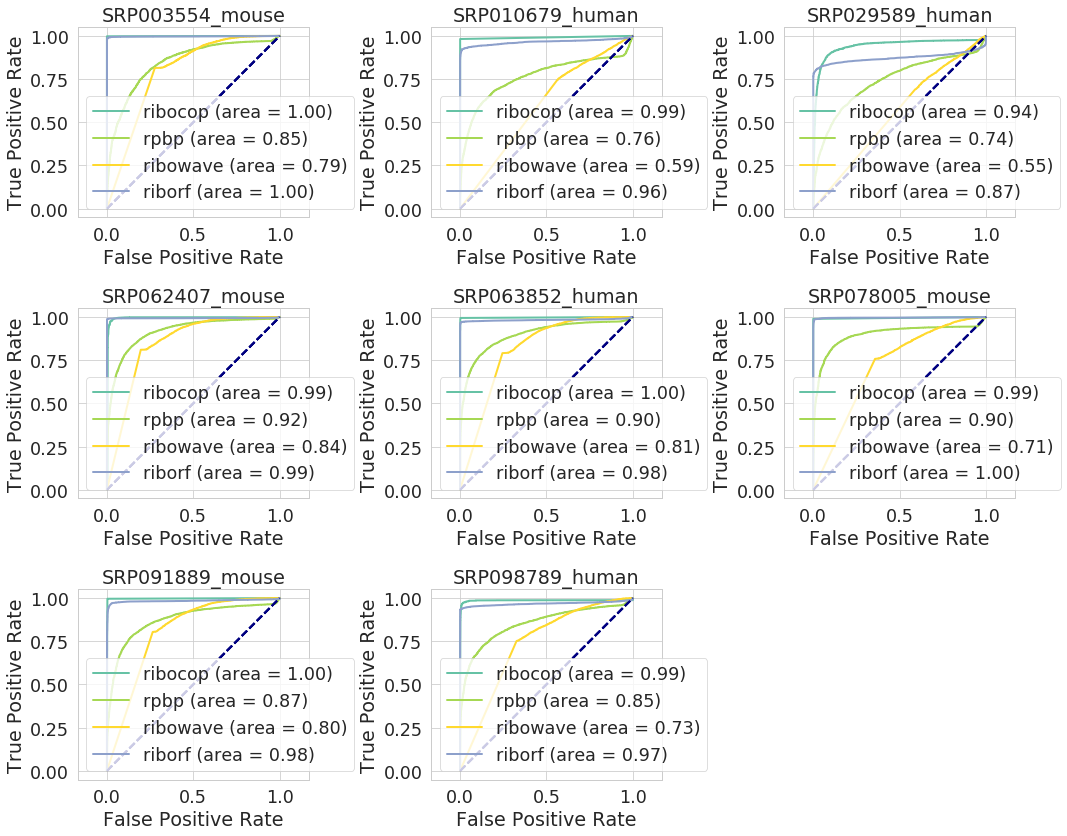

In [84]:
cbb_palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
tool_colors = {'ribocop': '#e41a1c',
          'ribocode': '#377eb8',
          'riborf': '#4daf4a',
          'orfrate': '#984ea3',
          'rpbp': '#ff7f00',
          'ribowave': '#ffff33'}
tool_colors = {'ribocop': '#66c2a5',
          'ribocode': '#fc8d62',
          'riborf': '#8da0cb',
          'orfrate': '#e78ac3',
          'rpbp': '#a6d854',
          'ribowave': '#ffd92f'}

def _plot_aurpr(y_test, y_score, ax, label, color):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auprc = average_precision_score(y_test, y_score)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    #ax = plt.subplot(111)
    ax.step(recall, precision, color=color, lw=3,
             where='post', label='{} ({:.2f})'.format(label, auprc))
    #ax.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    #ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
    #          average_precision))
    #ax.legend(loc="lower right")
    #ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
    #            mode="expand", borderaxespad=0, ncol=1)
    ax.legend(loc='lower left')

def _plot_auroc(y_test, y_score, ax, label, color):
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    ax.plot(fpr, tpr, color=color,
             lw=lw, label='{} (area = {:.2f})'.format(label, roc_auc))
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    #ax.set_title('Receiver operating characteristic example')
    #ax.legend(bbox_to_anchor=(0,1.1,1,0.2), loc="lower left",
     #         mode="expand", borderaxespad=0, ncol=1)
    ax.legend(loc='lower left')
    
#fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure(figsize=(15, 12))
all_samples = glob.glob('/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/*_ribocop_roc.txt')
i = 1


for sample in all_samples:
    sample_name = sample.split('/')[-1].replace('_roc.txt', '')
    sample_name = '_'.join(sample_name.split('_')[:2])
    print(sample_name)
    ax = plt.subplot(int(len(all_samples)/3)+1, 3 , i)
    
    for index, key in enumerate(['ribocop', 'ribocode', 'rpbp', 'orfrate', 'ribowave', 'riborf']):
        filepath = '/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/{}_{}_roc.txt'.format(sample_name, key)
        if not os.path.isfile(filepath):
            continue
        df = pd.read_table(filepath, names=['gid', 'tid', 'score', 'truth'])

        #df = df[df.score==df.score]
        try:
            df = df[df.score!='None']
        except:
            pass

        y_truth = df['truth']#.astype(int)
        y_score = df['score'].astype(float)
        if key == 'ribocode' or key == 'ribowave':
            y_truth_copy = y_truth.copy()
            y_truth_copy[y_truth_copy==0] = 1
            y_truth_copy[y_truth==1] = 0
            y_truth = y_truth_copy
        _plot_auroc(y_truth, y_score, ax, key, tool_colors[key])
        #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])

    ax.set_title(sample_name)
    ax.axis('equal')
    i+=1
    
fig.tight_layout()
fig.savefig('tx_level_auROC_all.pdf')

In [80]:
all_samples

[]

SRP003554_mouse
SRP010679_human
SRP029589_human
SRP062407_mouse
SRP063852_human
SRP078005_mouse
SRP091889_mouse
SRP098789_human


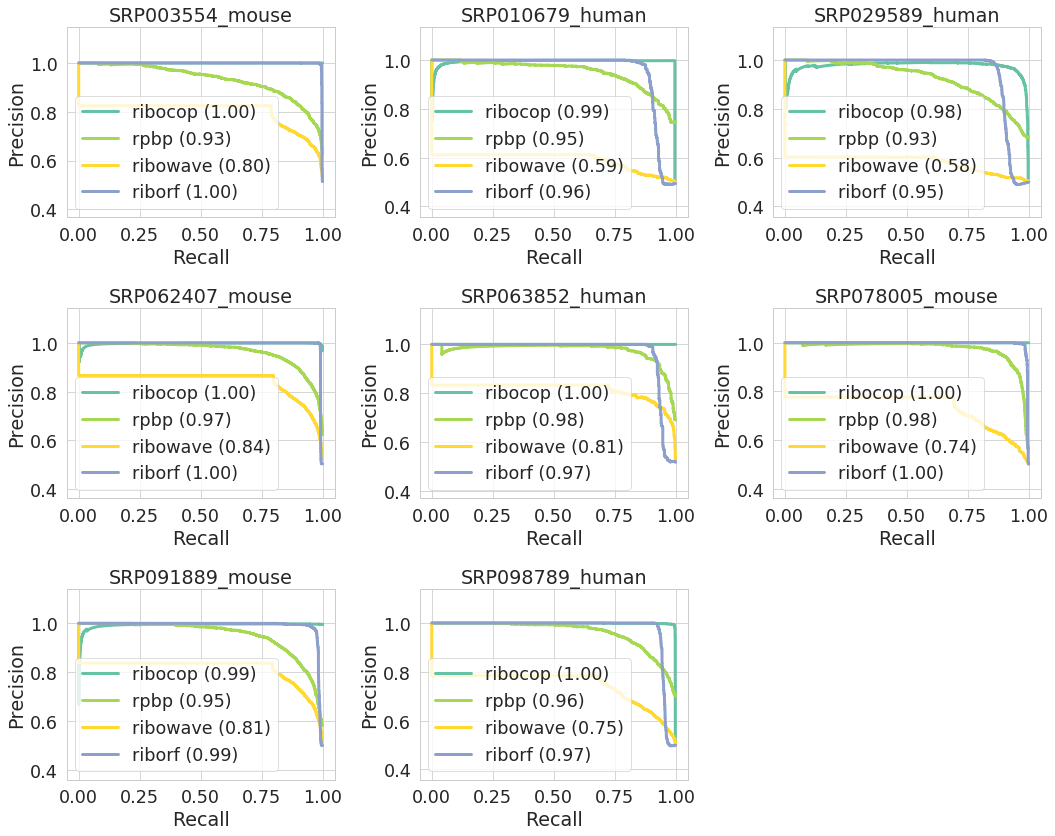

In [89]:
fig = plt.figure(figsize=(15, 12))

all_samples = glob.glob('/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/*_ribocop_roc.txt')

i = 1


for sample in all_samples:
    sample_name = sample.split('/')[-1].replace('_roc.txt', '')
    sample_name = '_'.join(sample_name.split('_')[:2])
    print(sample_name)
    genome = 'hg38'
    if 'mouse' in sample_name:
        genome = 'mm10'
    ax = plt.subplot(int(len(all_samples)/3)+1, 3 , i)
    tp_file = '/home/cmb-panasas2/wenzhenl/benchmark/gene_level/{0}/{1}/{1}_TP_CCDS_genes.txt'.format(genome, sample_name)
    if not os.path.isfile(tp_file):
        print(tp_file)
        continue
    tp = pd.read_table(tp_file)
    
    tp_transcripts = [strip_tx_version(tx) for tx in tp.transcript_id.unique()]
    for index, key in enumerate(['ribocop', 'ribocode', 'rpbp', 'orfrate', 'ribowave', 'riborf']):
        filepath = '/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/{}_{}_roc.txt'.format(sample_name, key)
        if not os.path.isfile(filepath):
            continue
        df = pd.read_table(filepath, names=['gid', 'tid', 'score', 'truth'])
        df = df[df.tid.isin(tp_transcripts)]
        #df = df[df.score==df.score]
        try:
            df = df[df.score!='None']
        except:
            pass

        y_truth = df['truth']#.astype(int)
        y_score = df['score'].astype(float)
        if key == 'ribocode' or key == 'ribowave':
            y_truth_copy = y_truth.copy()
            y_truth_copy[y_truth_copy==0] = 1
            y_truth_copy[y_truth==1] = 0
            y_truth = y_truth_copy
        _plot_aurpr(y_truth, y_score, ax, key, tool_colors[key])
        #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])

    ax.set_title(sample_name)
    ax.axis('equal')
    i+=1
    
fig.tight_layout()
fig.savefig('tx_level_auPR_all_filtered_tp.pdf')



SRP003554_mouse
SRP010679_human


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


SRP029589_human
SRP062407_mouse
SRP063852_human
SRP078005_mouse
SRP091889_mouse
SRP098789_human


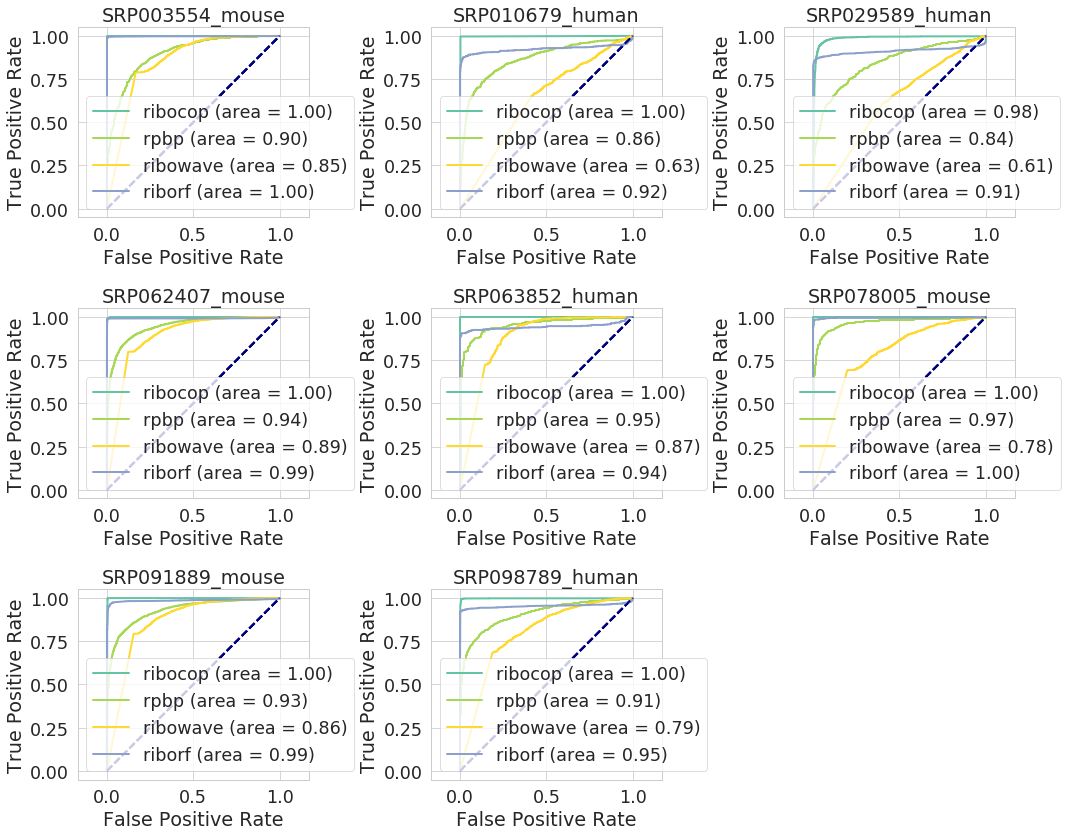

In [90]:
fig = plt.figure(figsize=(15, 12))

all_samples = glob.glob('/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/*_ribocop_roc.txt')

i = 1


for sample in all_samples:
    sample_name = sample.split('/')[-1].replace('_roc.txt', '')
    sample_name = '_'.join(sample_name.split('_')[:2])
    print(sample_name)
    genome = 'hg38'
    if 'mouse' in sample_name:
        genome = 'mm10'
    ax = plt.subplot(int(len(all_samples)/3)+1, 3 , i)
    tp_file = '/home/cmb-panasas2/wenzhenl/benchmark/gene_level/{0}/{1}/{1}_TP_CCDS_genes.txt'.format(genome, sample_name)
    if not os.path.isfile(tp_file):
        print(tp_file)
        continue
    tp = pd.read_table(tp_file)
    
    tp_transcripts = [strip_tx_version(tx) for tx in tp.transcript_id.unique()]
    for index, key in enumerate(['ribocop', 'ribocode', 'rpbp', 'orfrate', 'ribowave', 'riborf']):
        filepath = '/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/ROC/tx_level/{}_{}_roc.txt'.format(sample_name, key)
        if not os.path.isfile(filepath):
            continue
        df = pd.read_table(filepath, names=['gid', 'tid', 'score', 'truth'])
        df = df[df.tid.isin(tp_transcripts)]
        #df = df[df.score==df.score]
        try:
            df = df[df.score!='None']
        except:
            pass

        y_truth = df['truth']#.astype(int)
        y_score = df['score'].astype(float)
        if key == 'ribocode' or key == 'ribowave':
            y_truth_copy = y_truth.copy()
            y_truth_copy[y_truth_copy==0] = 1
            y_truth_copy[y_truth==1] = 0
            y_truth = y_truth_copy
        _plot_auroc(y_truth, y_score, ax, key, tool_colors[key])
        #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])

    ax.set_title(sample_name)
    ax.axis('equal')
    i+=1
    
fig.tight_layout()
fig.savefig('tx_level_auROC_all_filtered_tp.pdf')



In [74]:
df

,gid,tid,score,truth
0,ENSG00000101224,ENST00000245960,1.2851,1
1,ENSG00000101224,ENST00000245960,0.3370,0
2,ENSG00000107643,ENST00000374179,0.9401,1
3,ENSG00000107643,ENST00000374179,0.3926,0
4,ENSG00000278845,ENST00000619548,0.6855,1
5,ENSG00000278845,ENST00000619548,0.2183,0
6,ENSG00000064042,ENST00000512946,1.2782,1
7,ENSG00000064042,ENST00000512946,0.3392,0
9,ENSG00000126351,ENST00000450525,0.3561,0
11,ENSG00000124508,ENST00000432533,0.3415,0


In [57]:
len(all_samples)

6

In [49]:
filepath

'/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/scripts/gene_scripts/scripts/gene_scripts/SRP098789_human_riborf_roc.txt'

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


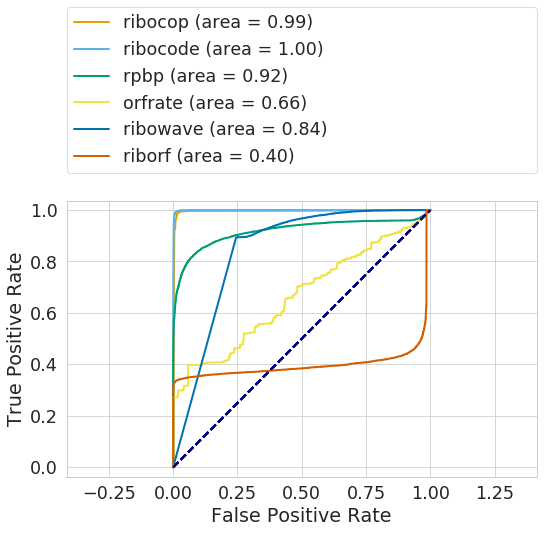

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
for index, key in enumerate(['ribocop', 'ribocode', 'rpbp', 'orfrate', 'ribowave', 'riborf']):
    df = pd.read_table('SRP063852_human_{}_roc_riborf.txt'.format(key), names=['gid', 'tid', 'score', 'truth'])
    #df = df[df.score==df.score]
    try:
        df = df[df.score!='None']
    except:
        pass

    y_truth = df['truth']#.astype(int)
    y_score = df['score'].astype(float)
    if key == 'ribocode' or key == 'ribowave':
        y_truth_copy = y_truth.copy()
        y_truth_copy[y_truth_copy==0] = 1
        y_truth_copy[y_truth==1] = 0
        y_truth = y_truth_copy
    _plot_auroc(y_truth, y_score, ax, key, cbb_palette[index+1])
    #_plot_aurpr(y_test, y_score, ax, 'ribocode', cbb_palette[2])
    
#ax.set_title(key)
ax.axis('equal')
fig.tight_layout()